In [13]:
EXPORT_PATH = "../data/processed/Analytics_Processed_df.pkl"

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score
from keras.layers import Dense,Dropout, BatchNormalization
from keras import regularizers

In [22]:
# Read Data 
df = pd.read_pickle(EXPORT_PATH)
df

,BWinnerW,Income,Need/Money,FamlyMembs,TR/Guest,TR/Camp,TR/Own,TR/Rental,Cluster
1,0,146,0,8,0,0,1,0,0
2,0,40,1,4,0,0,1,0,1
3,1,40,1,9,1,0,0,0,1
4,2,40,1,10,0,0,0,1,1
5,1,94,1,5,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1697,0,40,1,6,0,0,0,1,1
1698,0,40,1,6,0,0,1,0,1
1699,4,206,1,10,0,0,0,1,0
1700,3,40,1,5,0,1,0,0,1


In [23]:
model = Sequential()

# Add layers to the model
#model.add(Dense(8116, input_dim=3, activation='relu')) #input layer with 64 neurons
model.add(tf.keras.layers.Dense(256, input_shape=(x.shape[1],), activation='sigmoid'))
model.add(Dropout(0.5))
#model.add(Dense(2048,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(8,activation= 'relu'))
model.add(Dense(1, activation='sigmoid')) #output layer with 1 neuron 
model.compile(loss=['binary_crossentropy'], optimizer= tf.keras.optimizers.Nadam(4e-6),metrics = [tf.keras.metrics.AUC(curve='ROC')])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               2304      
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 8)                 1032      
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 36,241
Trainable params: 36,241
Non-trai

In [24]:
x = np.array(x)
y = np.array(y)

In [25]:
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size = 0.20 , shuffle = True)

In [17]:
xtrain = tf.expand_dims(x, axis=-1)

In [26]:
model.fit(X_train,y_train,validation_split = 0.20,batch_size = 3,epochs = 10)#,callbacks=[callbacks]

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 0.9551 - auc_2: 0.5281 - val_loss: 0.7401 - val_auc_2: 0.8435
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8460 - auc_2: 0.5108 - val_loss: 0.6910 - val_auc_2: 0.6945
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7778 - auc_2: 0.5210 - val_loss: 0.6506 - val_auc_2: 0.7541
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7222 - auc_2: 0.5338 - val_loss: 0.6269 - val_auc_2: 0.8500
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7172 - auc_2: 0.5169 - val_loss: 0.6131 - val_auc_2: 0.9154
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6804 - auc_2: 0.5504 - val_loss: 0.6028 - val_auc_2: 0.9728
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6714 - auc_2: 0.5665 - val_loss: 0.5940 - val_auc_2: 0.9848
Epoch 8/10
363/363 [============================

In [27]:
y_pred = model.predict(X_test)
print(y_pred)

11/11 [==============================] - 0s 4ms/step
[[0.61774033]
 [0.6402562 ]
 [0.644988  ]
 [0.6828782 ]
 [0.6133629 ]
 [0.6258813 ]
 [0.61384654]
 [0.7292541 ]
 [0.7255302 ]
 [0.6152237 ]
 [0.61386967]
 [0.62813723]
 [0.72724277]
 [0.72680175]
 [0.7304264 ]
 [0.723498  ]
 [0.6138106 ]
 [0.6168562 ]
 [0.72963077]
 [0.64722157]
 [0.72741824]
 [0.72734135]
 [0.63147044]
 [0.7260215 ]
 [0.6897228 ]
 [0.61115164]
 [0.7293849 ]
 [0.7304264 ]
 [0.6259424 ]
 [0.61831367]
 [0.61597604]
 [0.6321246 ]
 [0.7300432 ]
 [0.7248053 ]
 [0.7304264 ]
 [0.7297388 ]
 [0.6290538 ]
 [0.7297388 ]
 [0.6159549 ]
 [0.72635806]
 [0.6101222 ]
 [0.6170546 ]
 [0.7248233 ]
 [0.62264526]
 [0.6126878 ]
 [0.63352585]
 [0.72964567]
 [0.6303069 ]
 [0.62579995]
 [0.72711635]
 [0.7243657 ]
 [0.6354465 ]
 [0.7253261 ]
 [0.67012846]
 [0.7292501 ]
 [0.727508  ]
 [0.61479294]
 [0.6267984 ]
 [0.62320244]
 [0.7299666 ]
 [0.7240262 ]
 [0.6260847 ]
 [0.6328209 ]
 [0.69322747]
 [0.61293185]
 [0.7248233 ]
 [0.73053324]
 [0.65556

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [1701, 341]

In [34]:
y_pred_train = model.predict(X_test)
print(y_pred_train)

11/11 [==============================] - 0s 7ms/step
[[0.61774033]
 [0.6402562 ]
 [0.644988  ]
 [0.6828782 ]
 [0.6133629 ]
 [0.6258813 ]
 [0.61384654]
 [0.7292541 ]
 [0.7255302 ]
 [0.6152237 ]
 [0.61386967]
 [0.62813723]
 [0.72724277]
 [0.72680175]
 [0.7304264 ]
 [0.723498  ]
 [0.6138106 ]
 [0.6168562 ]
 [0.72963077]
 [0.64722157]
 [0.72741824]
 [0.72734135]
 [0.63147044]
 [0.7260215 ]
 [0.6897228 ]
 [0.61115164]
 [0.7293849 ]
 [0.7304264 ]
 [0.6259424 ]
 [0.61831367]
 [0.61597604]
 [0.6321246 ]
 [0.7300432 ]
 [0.7248053 ]
 [0.7304264 ]
 [0.7297388 ]
 [0.6290538 ]
 [0.7297388 ]
 [0.6159549 ]
 [0.72635806]
 [0.6101222 ]
 [0.6170546 ]
 [0.7248233 ]
 [0.62264526]
 [0.6126878 ]
 [0.63352585]
 [0.72964567]
 [0.6303069 ]
 [0.62579995]
 [0.72711635]
 [0.7243657 ]
 [0.6354465 ]
 [0.7253261 ]
 [0.67012846]
 [0.7292501 ]
 [0.727508  ]
 [0.61479294]
 [0.6267984 ]
 [0.62320244]
 [0.7299666 ]
 [0.7240262 ]
 [0.6260847 ]
 [0.6328209 ]
 [0.69322747]
 [0.61293185]
 [0.7248233 ]
 [0.73053324]
 [0.65556

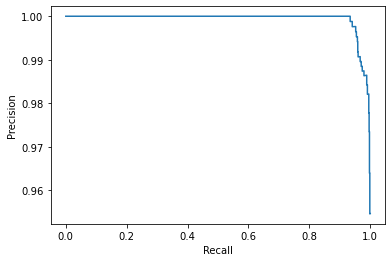

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assume y_true and y_scores are the true labels and predicted scores for your dataset
precision, recall, thresholds = precision_recall_curve(y_train, y_pred_train)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()